In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


Shape: (600, 15)
Missing Values:
 SSC_GPA                    0
HSC_GPA                    3
Family_Economy             0
Residence                  0
Family_Education           0
Politics                   0
Social_Media_Engagement    0
Residence_with_Family      0
Duration_of_Study          0
College_Location           0
School_Location            0
Bad_Habits                 0
Relationship               0
External_Factors           0
University                 0
dtype: int64
Duplicates: 95
Target Distribution:
 University
1    0.566667
0    0.433333
Name: proportion, dtype: float64
          SSC_GPA     HSC_GPA  Family_Economy   Residence  Family_Education  \
count  600.000000  597.000000      600.000000  600.000000        600.000000   
mean     4.853467    4.793032        2.673333    0.816667          0.866667   
std      0.322999    0.382941        0.887657    0.387262          0.340218   
min      2.990000    3.170000        1.000000    0.000000          0.000000   
25%      4.890

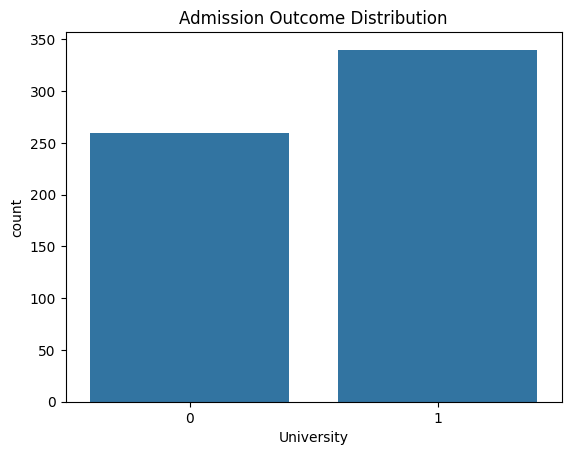

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/refs/heads/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)

# Basic exploration
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Target Distribution:\n", df['University'].value_counts(normalize=True))
print(df.describe())

# Visualize target distribution
sns.countplot(x='University', data=df)
plt.title("Admission Outcome Distribution")
plt.show()

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize AutoViz
AV = AutoViz_Class()
%matplotlib inline
# Run AutoViz
report = AV.AutoViz(
    filename="",  # Leave empty if using a DataFrame
    dfte=df,      # Your DataFrame
    chart_format="png",  # Try "svg", "png", or "jpg"
    verbose=0     # Try verbose=1 or 2
)

# Base

## Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # Importing SimpleImputer to handle missing values

# Load the dataset
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/refs/heads/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)

# Encode the target variable
le = LabelEncoder()
df['University'] = le.fit_transform(df['University'])

# Separate features and target
X = df.drop('University', axis=1)
y = df['University']

# Step 1: Handle missing values (impute with median)
imputer = SimpleImputer(strategy='median')  # You can change to 'mean', 'most_frequent', or constant (e.g., fill_value=123)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) # Imputing missing values with median

# Step 3: Drop duplicates based on features
df_combined = pd.concat([X_imputed, y], axis=1).drop_duplicates(subset=X_imputed.columns) # Using imputed data to drop duplicates
X_clean = df_combined.drop('University', axis=1)
y_clean = df_combined['University']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Model Training and Evaluation
rf = RandomForestClassifier(random_state=42)  # You can tune hyperparameters here
rf.fit(X_train, y_train)

# Tuned Test Accuracy
tuned_test_accuracy = accuracy_score(y_test, rf.predict(X_test))
print(f"Tuned Test Accuracy: {tuned_test_accuracy}")

# Tuned Test ROC-AUC
tuned_test_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"Tuned Test ROC-AUC: {tuned_test_roc_auc}")

# Full CV ROC-AUC (example using 5-fold cross-validation)
cv_roc_auc = cross_val_score(rf, X_clean, y_clean, cv=5, scoring='roc_auc') # Using cleaned data for cross-validation
print(f"Full CV ROC-AUC: {np.mean(cv_roc_auc)}")

Tuned Test Accuracy: 0.7878787878787878
Tuned Test ROC-AUC: 0.8533057851239669
Full CV ROC-AUC: 0.7891836734693877


# Feature Enginnering

## Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"

df = pd.read_csv(url)
X = df.drop(columns=['University'])
y = df['University']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X = pd.get_dummies(X, columns=['Residence'], drop_first=True)

# Your feature engineering
X_fe = X.copy()
X_fe['Average_GPA'] = (X_fe['SSC_GPA'] + X_fe['HSC_GPA']) / 2
X_fe['GPA_Diff'] = X_fe['HSC_GPA'] - X_fe['SSC_GPA']
X_fe['Study_Efficiency'] = X_fe['Duration_of_Study'] / X_fe['Average_GPA'].replace(0, 1e-6)
X_fe['Social_Impact'] = X_fe['Social_Media_Engagement'] * X_fe['Average_GPA']
X_fe['Family_Support'] = X_fe['Family_Economy'] + X_fe['Family_Education']
X_fe['Study_Social_Ratio'] = X_fe['Duration_of_Study'] / X_fe['Social_Media_Engagement'].replace(0, 1e-6)
X_fe = X_fe.drop(columns=['SSC_GPA', 'HSC_GPA', 'Social_Media_Engagement', 'External_Factors', 'Politics', 'Duration_of_Study', 'Family_Education'])

# Clean duplicates
df_combined = pd.concat([X_fe, y], axis=1).drop_duplicates(subset=X_fe.columns)
X_fe_clean = df_combined.drop(columns=['University'])
y_clean = df_combined['University']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_fe_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimized Random Forest (reduced depth, increased regularization)
rf_final = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=5, min_samples_leaf=3, random_state=42)
rf_final.fit(X_train_scaled, y_train)

# Evaluate test
y_pred = rf_final.predict(X_test_scaled)
y_prob = rf_final.predict_proba(X_test_scaled)[:, 1]
test_accuracy = accuracy_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_prob)
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test ROC-AUC: {test_roc_auc:.4f}")

# Cross-validation with 10 folds for stability
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_final, X_fe_clean, y_clean, cv=cv, scoring='roc_auc')
print(f"10-Fold CV ROC-AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Final Test Accuracy: 0.7957
Final Test ROC-AUC: 0.8609
10-Fold CV ROC-AUC: 0.8647 (±0.0477)


## Random Forest- ADABoost - XGBoost Comparison

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier  # For AdaBoost base estimator
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Load dataset
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)
X = df.drop(columns=['University'])
y = df['University']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X = pd.get_dummies(X, columns=['Residence'], drop_first=True)

# Feature engineering
X_fe = X.copy()
X_fe['Average_GPA'] = (X_fe['SSC_GPA'] + X_fe['HSC_GPA']) / 2
X_fe['GPA_Diff'] = X_fe['HSC_GPA'] - X_fe['SSC_GPA']
X_fe['Study_Efficiency'] = X_fe['Duration_of_Study'] / X_fe['Average_GPA'].replace(0, 1e-6)
X_fe['Social_Impact'] = X_fe['Social_Media_Engagement'] * X_fe['Average_GPA']
X_fe['Family_Support'] = X_fe['Family_Economy'] + X_fe['Family_Education']
X_fe['Study_Social_Ratio'] = X_fe['Duration_of_Study'] / X_fe['Social_Media_Engagement'].replace(0, 1e-6)
X_fe = X_fe.drop(columns=['SSC_GPA', 'HSC_GPA', 'Social_Media_Engagement', 'External_Factors', 'Politics', 'Duration_of_Study', 'Family_Education'])

# Clean duplicates
df_combined = pd.concat([X_fe, y], axis=1).drop_duplicates(subset=X_fe.columns)
X_fe_clean = df_combined.drop(columns=['University'])
y_clean = df_combined['University']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_fe_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimized Random Forest (for comparison)
rf_final = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=5, min_samples_leaf=3, random_state=42)
rf_final.fit(X_train_scaled, y_train)
# Evaluate Random Forest (for comparison)
rf_pred = rf_final.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
# Get probabilities for the positive class (assuming class 1 is positive)
rf_roc_auc = roc_auc_score(y_test, rf_final.predict_proba(X_test_scaled)[:, 1], multi_class='ovr')  # Multiclass adjustment
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Test ROC-AUC (OvR): {rf_roc_auc:.4f}")

# AdaBoost Classifier
# Using a decision tree with max_depth=1 as the base estimator (default for AdaBoost)
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=200,  # Number of boosting rounds
    learning_rate=0.5,  # Default learning rate
    random_state=42
)
ada.fit(X_train_scaled, y_train)

# Evaluate AdaBoost
ada_pred = ada.predict(X_test_scaled)
ada_accuracy = accuracy_score(y_test, ada_pred)

# Get probabilities for the positive class (assuming class 1 is positive)
ada_probs = ada.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
ada_roc_auc = roc_auc_score(y_test, ada_probs, multi_class='ovr')  # Multiclass adjustment

print(f"AdaBoost Test Accuracy: {ada_accuracy:.4f}")
print(f"AdaBoost Test ROC-AUC (OvR): {ada_roc_auc:.4f}")

# Cross-validation for AdaBoost (10-fold)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_cv_scores = cross_val_score(ada, X_fe_clean, y_clean, cv=cv, scoring='roc_auc_ovr')  # Multiclass adjustment
print(f"AdaBoost 10-Fold CV ROC-AUC (OvR): {ada_cv_scores.mean():.4f} (±{ada_cv_scores.std():.4f})")

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multiclass classification with probabilities
    num_class=len(np.unique(y_clean)),  # Number of unique classes in y
    n_estimators=50,  # Number of trees
    max_depth=3,  # Maximum depth of trees
    learning_rate=0.1,  # Step size shrinkage
    random_state=42,
    eval_metric='mlogloss'  # Multiclass log loss for evaluation
)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost
# Get predicted probabilities for each class
xgb_probs = xgb_model.predict_proba(X_test_scaled)

# Get class labels with the highest probability (argmax)
xgb_pred = np.argmax(xgb_probs, axis=1)

xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Get probabilities for the positive class (assuming class 1 is positive)
xgb_probs_positive_class = xgb_probs[:, 1]  # Select probabilities for class 1 only

# Calculate ROC-AUC for binary classification (using probabilities for positive class)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs_positive_class)  # No need for multi_class='ovr'

print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Test ROC-AUC: {xgb_roc_auc:.4f}")

Random Forest Test Accuracy: 0.7957
Random Forest Test ROC-AUC (OvR): 0.8609
AdaBoost Test Accuracy: 0.7957
AdaBoost Test ROC-AUC (OvR): 0.8484
AdaBoost 10-Fold CV ROC-AUC (OvR): 0.8571 (±0.0537)
XGBoost Test Accuracy: 0.8065
XGBoost Test ROC-AUC: 0.8484


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]  # Changed 'base_estimator__' to 'estimator__'
}
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42) # Changed 'base_estimator' to 'estimator'
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV ROC-AUC: {grid_search.best_score_:.4f}")

Best Params: {'estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 200}
Best CV ROC-AUC: 0.8596


## Random Forest- ADABoost - Tuned XGBoost Comparison

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)
X = df.drop(columns=['University'])
y = df['University']

# Encode target for XGBoost (XGBoost requires numeric labels starting from 0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Convert University to numeric labels

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X = pd.get_dummies(X, columns=['Residence'], drop_first=True)

# Feature engineering
X_fe = X.copy()
X_fe['Average_GPA'] = (X_fe['SSC_GPA'] + X_fe['HSC_GPA']) / 2
X_fe['GPA_Diff'] = X_fe['HSC_GPA'] - X_fe['SSC_GPA']
X_fe['Study_Efficiency'] = X_fe['Duration_of_Study'] / X_fe['Average_GPA'].replace(0, 1e-6)
X_fe['Social_Impact'] = X_fe['Social_Media_Engagement'] * X_fe['Average_GPA']
X_fe['Family_Support'] = X_fe['Family_Economy'] + X_fe['Family_Education']
X_fe['Study_Social_Ratio'] = X_fe['Duration_of_Study'] / X_fe['Social_Media_Engagement'].replace(0, 1e-6)
X_fe = X_fe.drop(columns=['SSC_GPA', 'HSC_GPA', 'Social_Media_Engagement', 'External_Factors', 'Politics', 'Duration_of_Study', 'Family_Education'])

# Clean duplicates
df_combined = pd.concat([X_fe, pd.Series(y, name='University')], axis=1).drop_duplicates(subset=X_fe.columns)
X_fe_clean = df_combined.drop(columns=['University'])
y_clean = df_combined['University']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_fe_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate Random Forest (for comparison)
rf_pred = rf_final.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
# Get probabilities for the positive class (assuming class 1 is positive)
rf_probs = rf_final.predict_proba(X_test_scaled)[:, 1]  # Select probabilities for class 1 only
# Calculate ROC-AUC for binary classification
rf_roc_auc = roc_auc_score(y_test, rf_probs)  # No need for multi_class='ovr' for binary case

print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Test ROC-AUC: {rf_roc_auc:.4f}")

# Tuned AdaBoost (for comparison)
ada_tuned = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)
ada_tuned.fit(X_train_scaled, y_train)
# Evaluate AdaBoost
ada_pred = ada_tuned.predict(X_test_scaled)
ada_accuracy = accuracy_score(y_test, ada_pred)

# Get probabilities for the positive class (assuming class 1 is positive)
ada_probs = ada_tuned.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 only

# Calculate ROC-AUC for binary classification
ada_roc_auc = roc_auc_score(y_test, ada_probs)  # No need for multi_class='ovr' for binary case

print(f"AdaBoost Test Accuracy: {ada_accuracy:.4f}")
print(f"AdaBoost Test ROC-AUC: {ada_roc_auc:.4f}")

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multiclass classification with probabilities
    num_class=len(np.unique(y_clean)),  # Number of unique classes in y
    n_estimators=100,  # Number of trees
    max_depth=6,  # Maximum depth of trees
    learning_rate=0.1,  # Step size shrinkage
    random_state=42,
    eval_metric='mlogloss'  # Multiclass log loss for evaluation
)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost
# Get predicted probabilities for each class
xgb_probs = xgb_model.predict_proba(X_test_scaled)

# Get class labels with the highest probability (argmax)
xgb_pred = np.argmax(xgb_probs, axis=1)

xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Get probabilities for the positive class (assuming class 1 is positive)
xgb_probs_positive_class = xgb_probs[:, 1]  # Select probabilities for class 1 only

# Calculate ROC-AUC for binary classification (using probabilities for positive class)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs_positive_class)  # No need for multi_class='ovr'

print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Test ROC-AUC: {xgb_roc_auc:.4f}")

Random Forest Test Accuracy: 0.7957
Random Forest Test ROC-AUC: 0.8609
AdaBoost Test Accuracy: 0.7957
AdaBoost Test ROC-AUC: 0.8484
XGBoost Test Accuracy: 0.8387
XGBoost Test ROC-AUC: 0.8516


# Random Forest

Robust Scalar Without the Outliers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load dataset
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)
X = df.drop(columns=['University'])
y = df['University']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X = pd.get_dummies(X, columns=['Residence'], drop_first=True)

# Feature engineering
X_fe = X.copy()
X_fe['Average_GPA'] = (X_fe['SSC_GPA'] + X_fe['HSC_GPA']) / 2
X_fe['GPA_Diff'] = X_fe['HSC_GPA'] - X_fe['SSC_GPA']
X_fe['Study_Efficiency'] = X_fe['Duration_of_Study'] / X_fe['Average_GPA'].replace(0, 1e-6)
X_fe['Social_Impact'] = X_fe['Social_Media_Engagement'] * X_fe['Average_GPA']
X_fe['Family_Support'] = X_fe['Family_Economy'] + X_fe['Family_Education']
X_fe['Study_Social_Ratio'] = X_fe['Duration_of_Study'] / X_fe['Social_Media_Engagement'].replace(0, 1e-6)
X_fe = X_fe.drop(columns=['SSC_GPA', 'HSC_GPA', 'Social_Media_Engagement', 'External_Factors', 'Politics', 'Duration_of_Study', 'Family_Education'])

# Clean duplicates
df_combined = pd.concat([X_fe, pd.Series(y, name='University')], axis=1).drop_duplicates(subset=X_fe.columns)
X_fe_clean = df_combined.drop(columns=['University'])
y_clean = df_combined['University'].values.ravel()

# Cap outliers
continuous_features = ['Average_GPA', 'GPA_Diff', 'Study_Efficiency', 'Social_Impact', 'Family_Support', 'Study_Social_Ratio']
for col in continuous_features:
    Q1 = X_fe_clean[col].quantile(0.25)
    Q3 = X_fe_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_before = ((X_fe_clean[col] < lower_bound) | (X_fe_clean[col] > upper_bound)).sum()
    X_fe_clean[col] = X_fe_clean[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped {outliers_before} outliers in {col}. Rows remain: {len(X_fe_clean)}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X_fe_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)
y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_final = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=5, min_samples_leaf=3, random_state=42)
rf_final.fit(X_train_scaled, y_train)
rf_pred = rf_final.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_probs = rf_final.predict_proba(X_test_scaled)
rf_roc_auc = roc_auc_score(y_test, rf_probs[:, 1])  # Binary ROC-AUC
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Test ROC-AUC: {rf_roc_auc:.4f}")

Capped 29 outliers in Average_GPA. Rows remain: 461
Capped 131 outliers in GPA_Diff. Rows remain: 461
Capped 0 outliers in Study_Efficiency. Rows remain: 461
Capped 0 outliers in Social_Impact. Rows remain: 461
Capped 27 outliers in Family_Support. Rows remain: 461
Capped 86 outliers in Study_Social_Ratio. Rows remain: 461
Random Forest Test Accuracy: 0.8065
Random Forest Test ROC-AUC: 0.8633


# ADABoost


Standard Scaler With the Outliers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load dataset
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)
X = df.drop(columns=['University'])
y = df['University']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X = pd.get_dummies(X, columns=['Residence'], drop_first=True)

# Feature engineering
X_fe = X.copy()
X_fe['Average_GPA'] = (X_fe['SSC_GPA'] + X_fe['HSC_GPA']) / 2
X_fe['GPA_Diff'] = X_fe['HSC_GPA'] - X_fe['SSC_GPA']
X_fe['Study_Efficiency'] = X_fe['Duration_of_Study'] / X_fe['Average_GPA'].replace(0, 1e-6)
X_fe['Social_Impact'] = X_fe['Social_Media_Engagement'] * X_fe['Average_GPA']
X_fe['Family_Support'] = X_fe['Family_Economy'] + X_fe['Family_Education']
X_fe['Study_Social_Ratio'] = X_fe['Duration_of_Study'] / X_fe['Social_Media_Engagement'].replace(0, 1e-6)
X_fe = X_fe.drop(columns=['SSC_GPA', 'HSC_GPA', 'Social_Media_Engagement', 'External_Factors', 'Politics', 'Duration_of_Study', 'Family_Education'])

# Clean duplicates
df_combined = pd.concat([X_fe, pd.Series(y, name='University')], axis=1).drop_duplicates(subset=X_fe.columns)
X_fe_clean = df_combined.drop(columns=['University'])
y_clean = df_combined['University'].values.ravel()

# Split
X_train, X_test, y_train, y_test = train_test_split(X_fe_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)
y_train = y_train.ravel()
y_test = y_test.ravel()

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tuned AdaBoost
ada_tuned = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)
ada_tuned.fit(X_train_scaled, y_train)
ada_pred = ada_tuned.predict(X_test_scaled)
ada_accuracy = accuracy_score(y_test, ada_pred)
ada_probs = ada_tuned.predict_proba(X_test_scaled)
ada_roc_auc = roc_auc_score(y_test, ada_probs[:, 1])
print(f"AdaBoost Test Accuracy: {ada_accuracy:.4f}")
print(f"AdaBoost Test ROC-AUC (OvR): {ada_roc_auc:.4f}")

AdaBoost Test Accuracy: 0.7957
AdaBoost Test ROC-AUC (OvR): 0.8484


# XGBoost

Standard Scaler with the Outliers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load dataset
url = "https://raw.githubusercontent.com/Ashfinn/admission-feature-analysis/main/Undergraduate%20Admission%20Test%20Survey%20in%20Bangladesh.csv"
df = pd.read_csv(url)
X = df.drop(columns=['University'])
y = df['University']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X = pd.get_dummies(X, columns=['Residence'], drop_first=True)

# Feature engineering
X_fe = X.copy()
X_fe['Average_GPA'] = (X_fe['SSC_GPA'] + X_fe['HSC_GPA']) / 2
X_fe['GPA_Diff'] = X_fe['HSC_GPA'] - X_fe['SSC_GPA']
X_fe['Study_Efficiency'] = X_fe['Duration_of_Study'] / X_fe['Average_GPA'].replace(0, 1e-6)
X_fe['Social_Impact'] = X_fe['Social_Media_Engagement'] * X_fe['Average_GPA']
X_fe['Family_Support'] = X_fe['Family_Economy'] + X_fe['Family_Education']
X_fe['Study_Social_Ratio'] = X_fe['Duration_of_Study'] / X_fe['Social_Media_Engagement'].replace(0, 1e-6)
X_fe = X_fe.drop(columns=['SSC_GPA', 'HSC_GPA', 'Social_Media_Engagement', 'External_Factors', 'Politics', 'Duration_of_Study', 'Family_Education'])

# Clean duplicates
df_combined = pd.concat([X_fe, pd.Series(y, name='University')], axis=1).drop_duplicates(subset=X_fe.columns)
X_fe_clean = df_combined.drop(columns=['University'])
y_clean = df_combined['University'].values.ravel()

# Split
X_train, X_test, y_train, y_test = train_test_split(X_fe_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)
y_train = y_train.ravel()
y_test = y_test.ravel()

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multiclass classification with probabilities
    num_class=len(np.unique(y_clean)),  # Number of unique classes in y
    n_estimators=100,  # Number of trees
    max_depth=6,  # Maximum depth of trees
    learning_rate=0.1,  # Step size shrinkage
    random_state=42,
    eval_metric='mlogloss'  # Multiclass log loss for evaluation
)
xgb_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for each class
xgb_probs = xgb_model.predict_proba(X_test_scaled)
# Get class labels with the highest probability (argmax)
xgb_pred = np.argmax(xgb_probs, axis=1) # Get predicted class labels instead of probabilities

xgb_accuracy = accuracy_score(y_test, xgb_pred)  # Now using predicted labels
xgb_roc_auc = roc_auc_score(y_test, xgb_probs[:, 1])  # Using probabilities for ROC AUC
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Test ROC-AUC (OvR): {xgb_roc_auc:.4f}")

XGBoost Test Accuracy: 0.8387
XGBoost Test ROC-AUC (OvR): 0.8516
